In [3]:
import numpy as np
import pandas as pd
from glob import glob
from joblib import Parallel, delayed
import matplotlib.pyplot as plt

In [1]:
class datacleaner():
    def __init__(self):
        self.flist = glob('./rawfiles/*csv')
        dfs= Parallel(n_jobs=2)(delayed(pd.read_csv)(i) for i in flist)
        self.df = pd.concat(dfs)
        self.clean()
    def clean(self):
        df = self.df
        df['DATETIME'] = df['DATE'].astype(str) + ' ' + df['TIME']
        df['DATETIME'] = pd.to_datetime(df['DATETIME'])
        
        df = df[['DATETIME','PRICE','SIZE']]
        df['PRICE'] = df['PRICE'].astype(np.float32)
        df['SIZE'] = df['PRICE'].astype(int)
        
        df = df.sort_values(by='DATETIME').reset_index().drop('index',axis=1)
        
        df = df.drop(df[df.PRICE>5000].index)
        
        self.hourly=df.resample('H', on='DATETIME').median()
        self.df = df
        
        
    def neg_outlier(self):
        prices = self.df.PRICE
        r = prices.rolling(window=4000)  # Create a rolling object 
        mps = r.mean() - 60. * r.std()  # Combine a mean and stdev on that object
        outliers = prices[prices < mps].index
    
        self.df = self.df.drop(outliers)
        self.write()
        
    def write(self):
        self.df.to_pickle('AMZN_2007_2014.pickle')
        self.hourly.to_pickle('AMZN_hourly.pickle')

In [4]:
df = pd.read_pickle('AMZN_2007_2014.pickle')

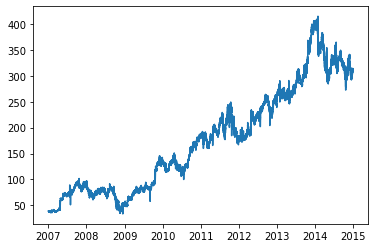

In [50]:
plt.plot(df.DATETIME, df.PRICE)
plt.show()